## Credit Card customer segmentation

Dataset for this consists of credit card usage beheavior of customers with 18 behavioral features. 
Segmentation of custormer can be used to define marketing strategies. 

## 0. Imports and dataset loading

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv (r"E:\CIENCIA DE DATOS\DATA SCIENCE PORTFOLIO\DATA-SCIENCE-PORTFOLIO\Clustering\Credit Card customer segmentation\CC GENERAL.csv")

In [3]:
print (df.shape)
df.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 2. Data Preprocessing

* CUST_ID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases 
* BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFF_PURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES : Amount of purchase done in installment
* CASH_ADVANCE : Cash in advance given by the user
* PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASES_TRX : Number of purchase transactions made
* CREDIT_LIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

### 2.1 Descriptive Statistics of Data

In [4]:
df.describe ()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.drop('TENURE', inplace=True, axis=1)

### 2.2 Dealing with nulls

In [6]:
# Detectin nulls values in dataset

df.isnull().sum().sort_values(ascending = False).head()


MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
PURCHASES_INSTALLMENTS_FREQUENCY      0
PAYMENTS                              0
dtype: int64

In [7]:
# Imputing missing values with mean

df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

df.loc[(df['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [8]:
df.isnull().sum().sort_values(ascending = False).head()


CUST_ID                             0
PURCHASES_INSTALLMENTS_FREQUENCY    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
dtype: int64

### 2.3 Dealing with Outliers

By dropping outliers we can lose many rows as there are too many outliers in dataset. So making ranges to deal with extreme values. Furthermore, the outliers help us create well-differentiated clusters, so they must be finely tuned to avoid overly homogenizing the dataset.

In [9]:
columns = df.columns

Boxploting of columns to visualizing the outliers

In [10]:
columns_to_plot = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
                   'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                   'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                   'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                   'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                   'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

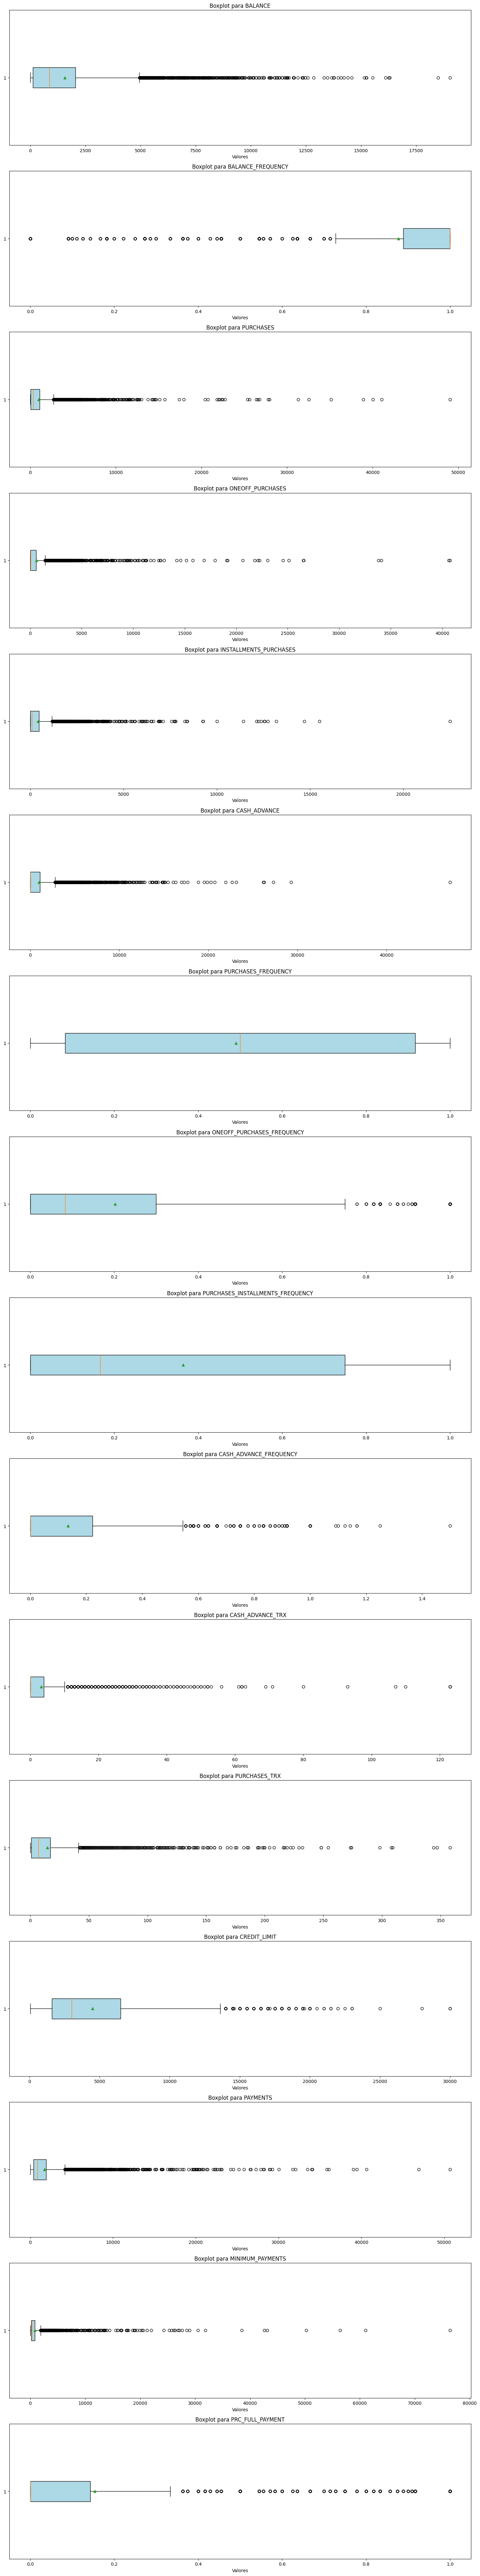

In [11]:
# Crear los boxplots
plt.figure(figsize=(15, len(columns_to_plot) * 5))

for i, column in enumerate(columns_to_plot):
    plt.subplot(len(columns_to_plot), 1, i + 1)
    data = df[column].dropna()
    
    # Crear el boxplot
    boxplot = plt.boxplot(data, vert=False, patch_artist=True, showmeans=True)
    
    # Color de la caja
    for patch in boxplot['boxes']:
        patch.set_facecolor('lightblue')
    
    # Añadir título y etiquetas
    plt.title(f'Boxplot para {column}')
    plt.xlabel('Valores')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

#### 2.3.4 Transformation of data in ranges

In [12]:
df_range = df.copy()

In [13]:
df_range.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [14]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    df_range[Range]=0        
    df_range.loc[((df_range[c]>0)&(df_range[c]<=500)),Range]=1
    df_range.loc[((df_range[c]>500)&(df_range[c]<=1000)),Range]=2
    df_range.loc[((df_range[c]>1000)&(df_range[c]<=3000)),Range]=3
    df_range.loc[((df_range[c]>3000)&(df_range[c]<=5000)),Range]=4
    df_range.loc[((df_range[c]>5000)&(df_range[c]<=10000)),Range]=5
    df_range.loc[((df_range[c]>10000)),Range]=6

In [15]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    df_range[Range]=0
    df_range.loc[((df_range[c]>0)&(df_range[c]<=0.1)),Range]=1
    df_range.loc[((df_range[c]>0.1)&(df_range[c]<=0.2)),Range]=2
    df_range.loc[((df_range[c]>0.2)&(df_range[c]<=0.3)),Range]=3
    df_range.loc[((df_range[c]>0.3)&(df_range[c]<=0.4)),Range]=4
    df_range.loc[((df_range[c]>0.4)&(df_range[c]<=0.5)),Range]=5
    df_range.loc[((df_range[c]>0.5)&(df_range[c]<=0.6)),Range]=6
    df_range.loc[((df_range[c]>0.6)&(df_range[c]<=0.7)),Range]=7
    df_range.loc[((df_range[c]>0.7)&(df_range[c]<=0.8)),Range]=8
    df_range.loc[((df_range[c]>0.8)&(df_range[c]<=0.9)),Range]=9
    df_range.loc[((df_range[c]>0.9)&(df_range[c]<=1.0)),Range]=10

In [16]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    df_range[Range]=0
    df_range.loc[((df_range[c]>0)&(df_range[c]<=5)),Range]=1
    df_range.loc[((df_range[c]>5)&(df_range[c]<=10)),Range]=2
    df_range.loc[((df_range[c]>10)&(df_range[c]<=15)),Range]=3
    df_range.loc[((df_range[c]>15)&(df_range[c]<=20)),Range]=4
    df_range.loc[((df_range[c]>20)&(df_range[c]<=30)),Range]=5
    df_range.loc[((df_range[c]>30)&(df_range[c]<=50)),Range]=6
    df_range.loc[((df_range[c]>50)&(df_range[c]<=100)),Range]=7
    df_range.loc[((df_range[c]>100)),Range]=8

In [17]:
df_range.drop(['CUST_ID','BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

In [18]:
X_range= np.asarray(df_range)

In [19]:
scale = StandardScaler()
X_range = scale.fit_transform(X_range)
X_range.shape

(8950, 16)

## 3.Modeling

### 3.1 Clustering using Kmeans for data in ranges

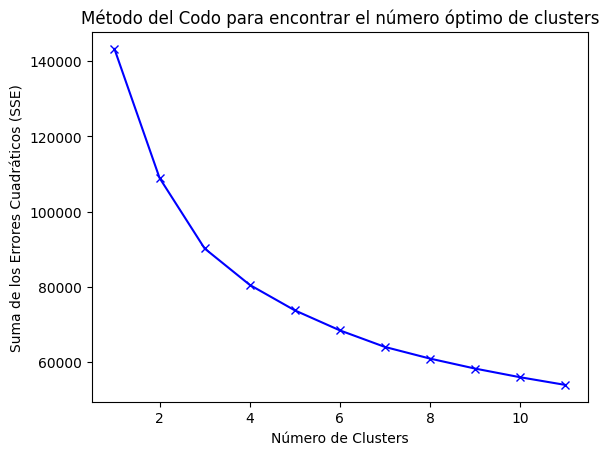

In [20]:
# Método del codo para encontrar número óptimo de clusters
sse = []
k_range = range(1, 12)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_range)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de los Errores Cuadráticos (SSE)')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.show()

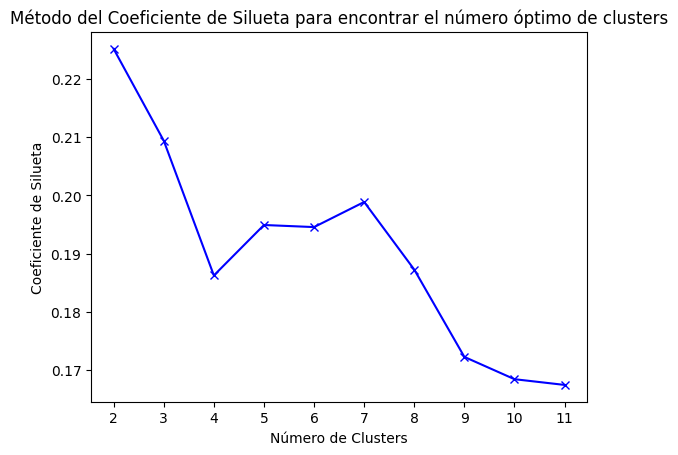

In [21]:
silhouette_scores = []
k_range = range(2, 12)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_range)
    score = silhouette_score(X_range, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Método del Coeficiente de Silueta para encontrar el número óptimo de clusters')
plt.xticks(range(2, 12))  # 
plt.show()

#### Choosing 4 no of clusters 

In [22]:
kmean= KMeans(4)
kmean.fit(X_range)
labels=kmean.labels_

In [23]:
clusters=pd.concat([df_range, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,2
1,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,0
2,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,1
3,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1,2
4,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,2


### 3.1.2 Interpretation of Clusters

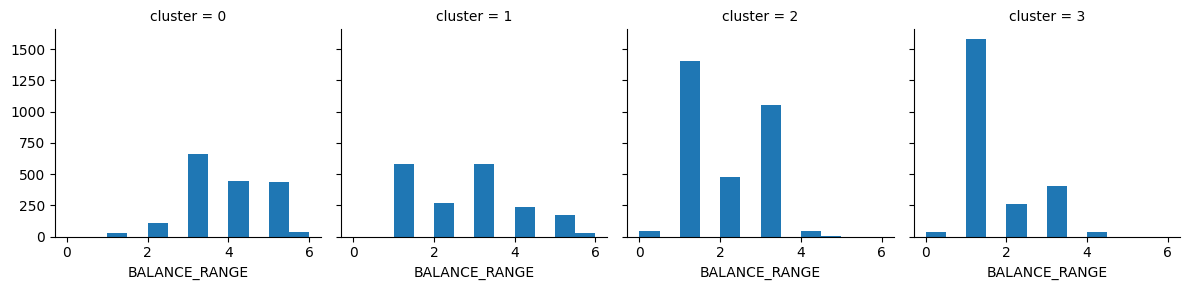

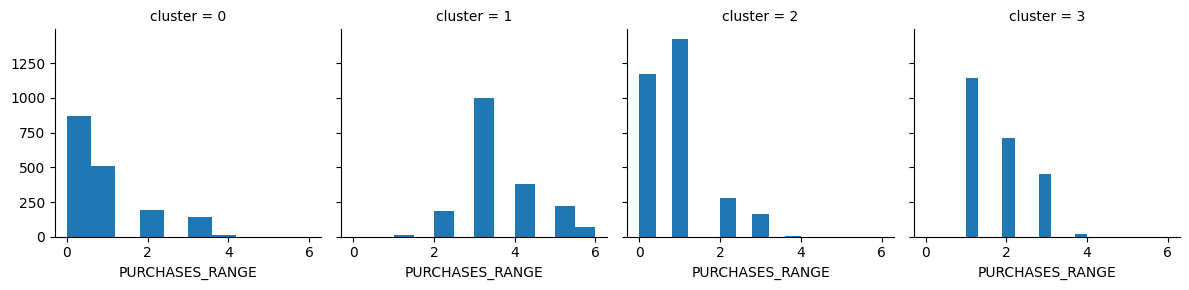

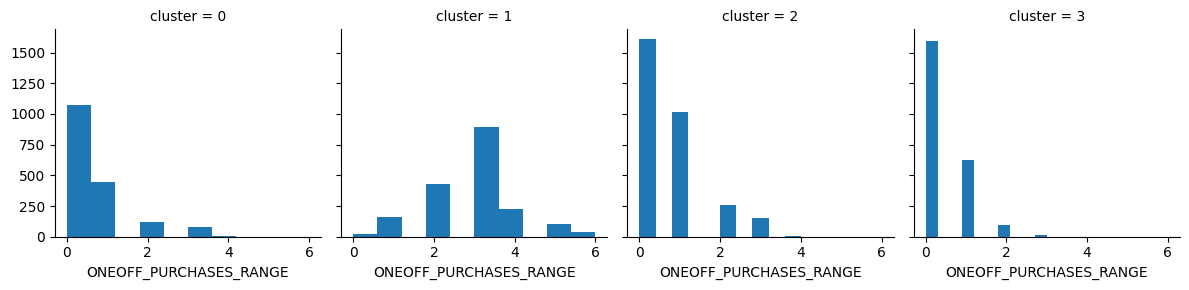

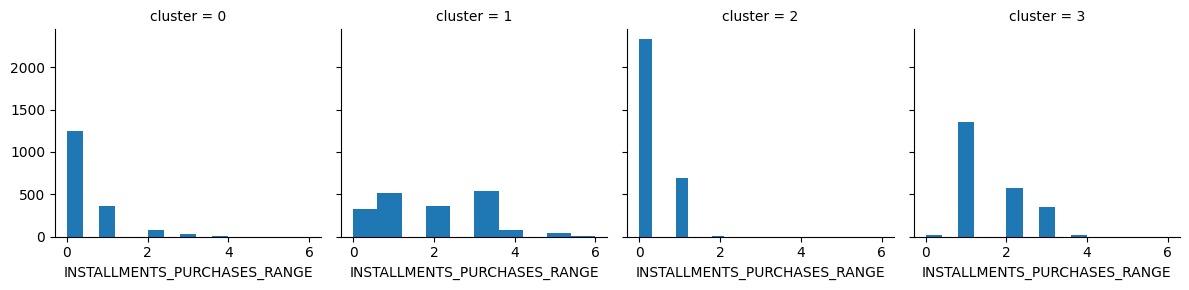

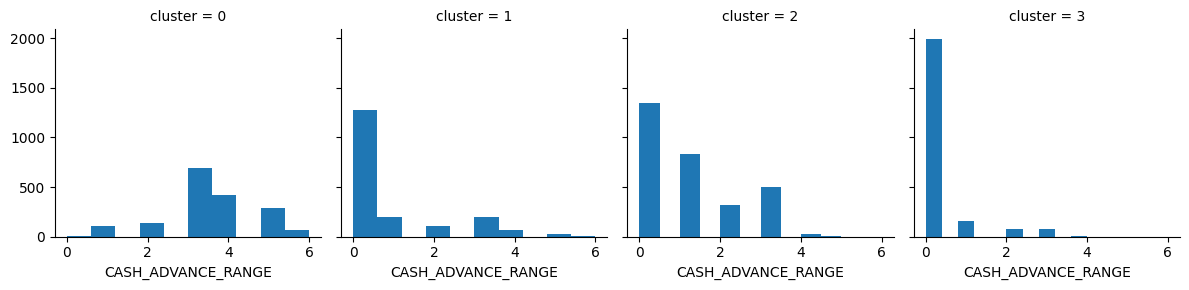

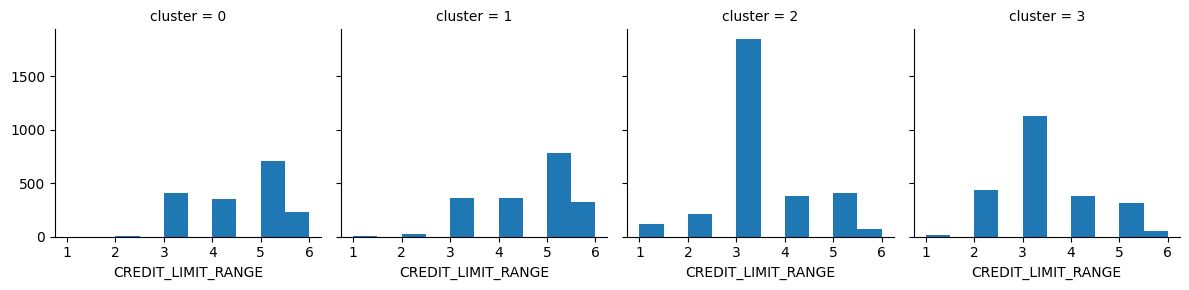

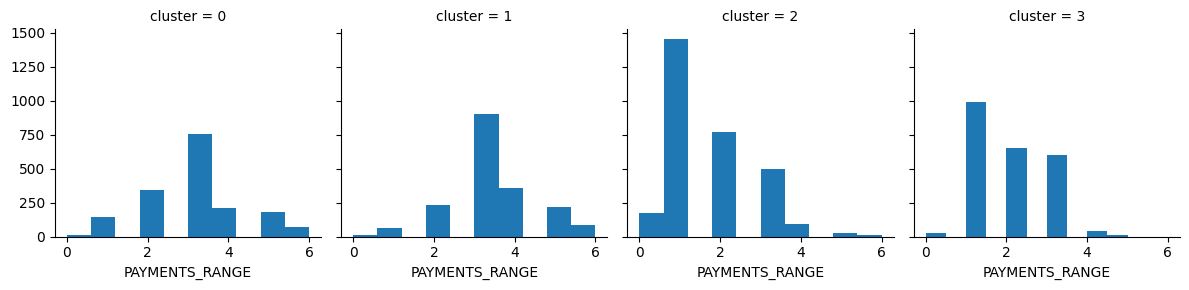

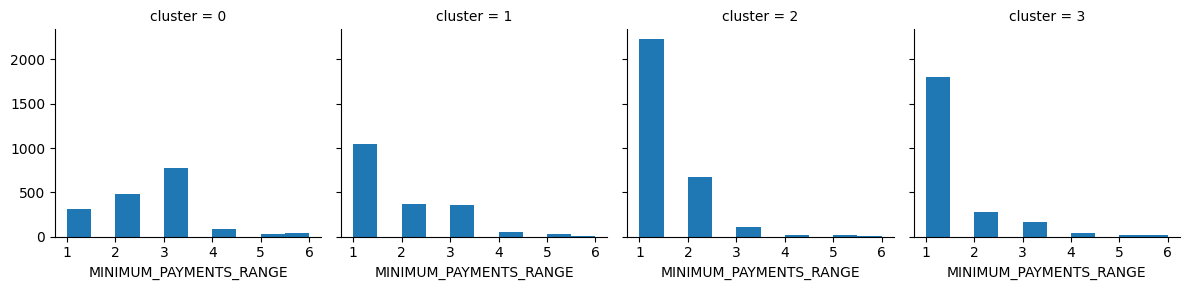

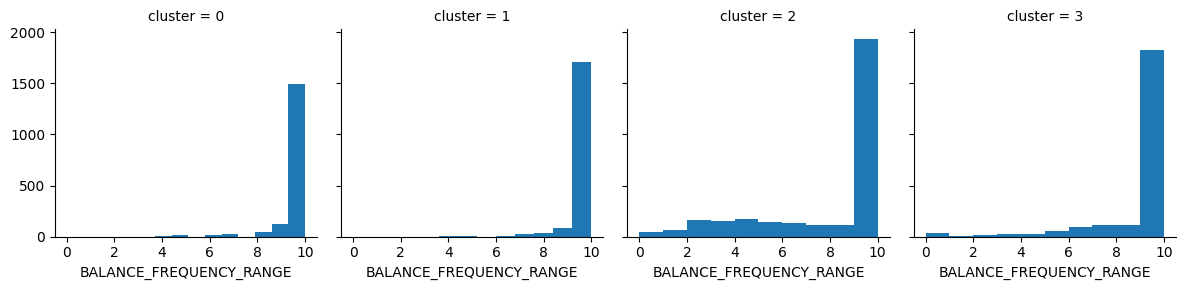

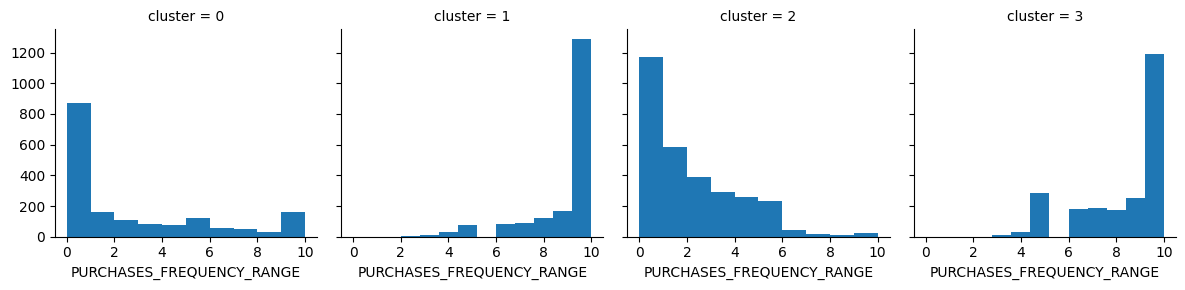

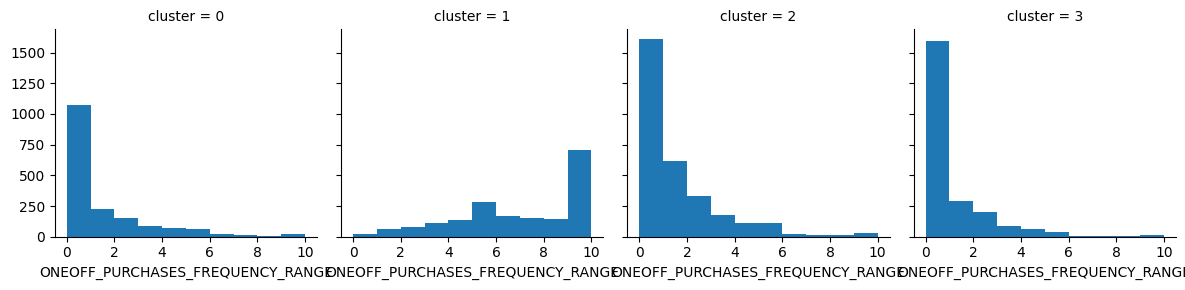

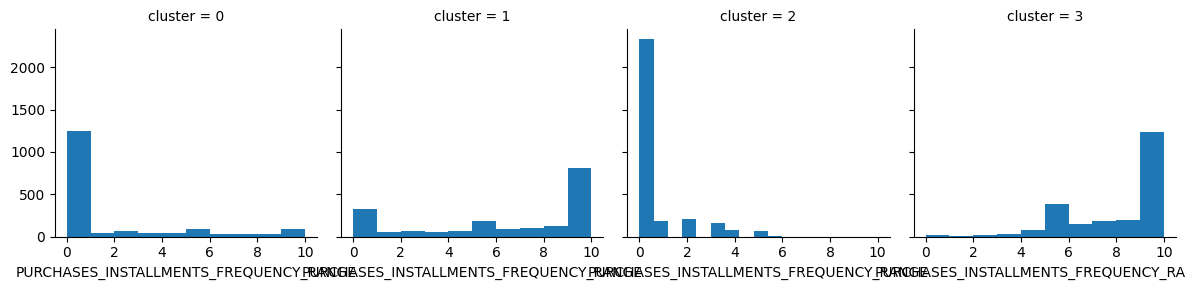

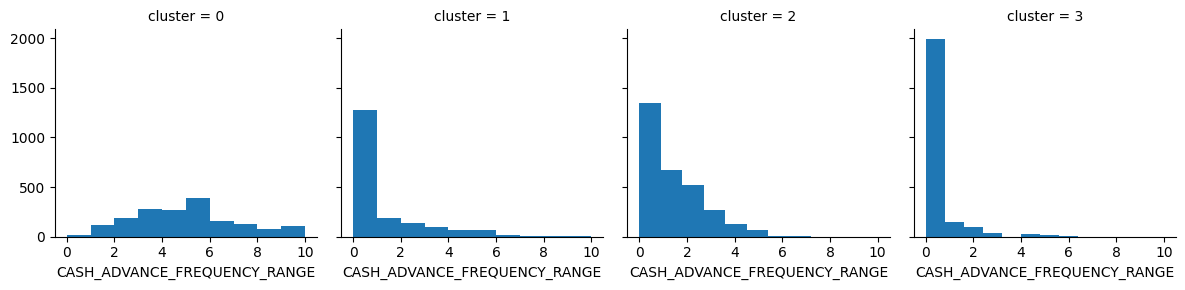

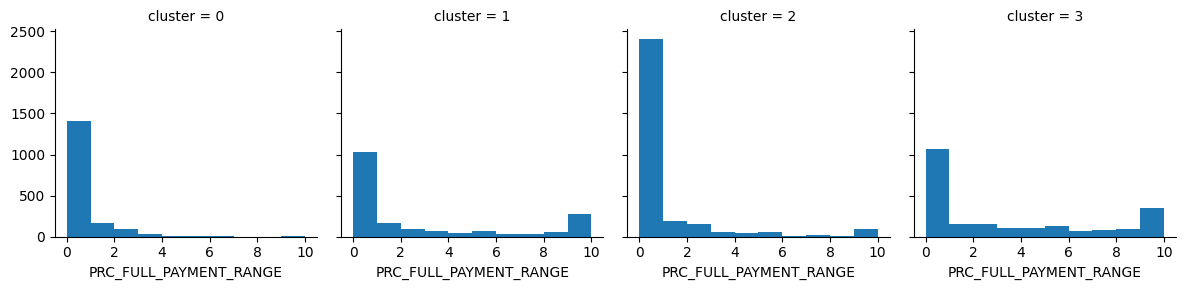

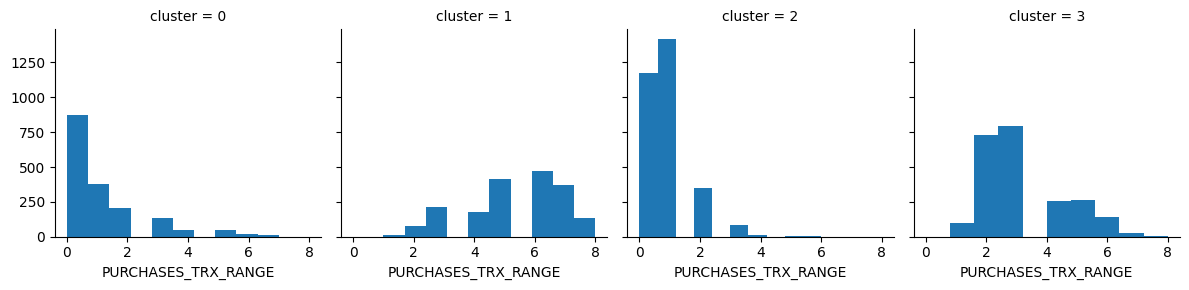

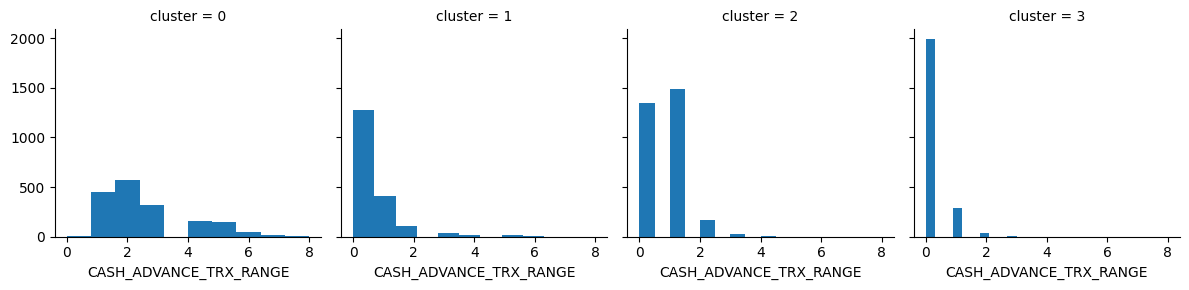

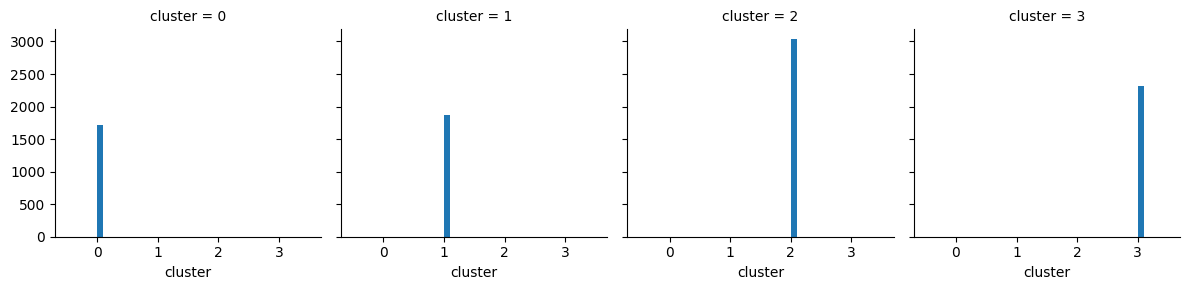

In [24]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

Cluster 0: Low Spenders
Customers with low balances, few purchases, and low usage of cash advances. These customers tend to have low credit limits and make low payments. Installment purchases are minimal, indicating a preference for one-off transactions over planned payments.

Cluster 1: Moderate Managers
Customers with moderate balances, moderate and frequent purchases, and a moderate use of cash advances. They have moderate credit limits and make payments in moderate amounts. These customers show a balanced approach with a notable use of installment purchases, suggesting a tendency to spread out payments over time while still engaging in frequent purchasing activities.

Cluster 2: Balanced Spenders
Customers with varied balances but a trend towards higher balances. They make moderate purchases and have a moderate use of cash advances. These customers have higher credit limits and make higher payments. There is a moderate frequency of installment purchases, indicating that while they do engage in planned payments, it is not as prevalent as in other clusters. Cash advance requests are also moderate, reflecting occasional liquidity needs.

Cluster 3: High Spenders
Customers with high balances, frequent and high-amount purchases, and frequent use of cash advances. They have the highest credit limits and make high payments. Installment purchases are frequent and substantial, highlighting a strong inclination towards spreading out their expenses over time. The frequent and substantial cash advances signify a significant reliance on immediate liquidity

## 4. Visualization of Clusters


#### Using PCA to transform data to 2 dimensions for visualization

Finally I have decided to choose clustering with the dataset transformed to ranges instead of transformed to deciles. The first achieves a lower absolute value with the silhouette coefficient method.

In [25]:
X_range

array([[-0.97851102, -0.43862278, -0.8021931 , ..., -0.54119881,
        -0.64681226, -0.69462206],
       [ 1.29798329, -1.18015543, -0.8021931 , ...,  0.45299851,
        -1.09971241,  0.12597818],
       [ 0.53915185,  0.30290987,  0.77280487, ..., -0.54119881,
         0.25898804, -0.69462206],
       ...,
       [-0.97851102, -0.43862278, -0.8021931 , ...,  0.45299851,
        -0.64681226, -0.69462206],
       [-0.97851102, -1.18015543, -0.8021931 , ...,  0.45299851,
        -1.09971241,  0.12597818],
       [-0.97851102,  1.04444252,  1.56030386, ..., -0.54119881,
         1.16478834,  0.12597818]])

In [26]:
dist = 1 - cosine_similarity(X_range)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

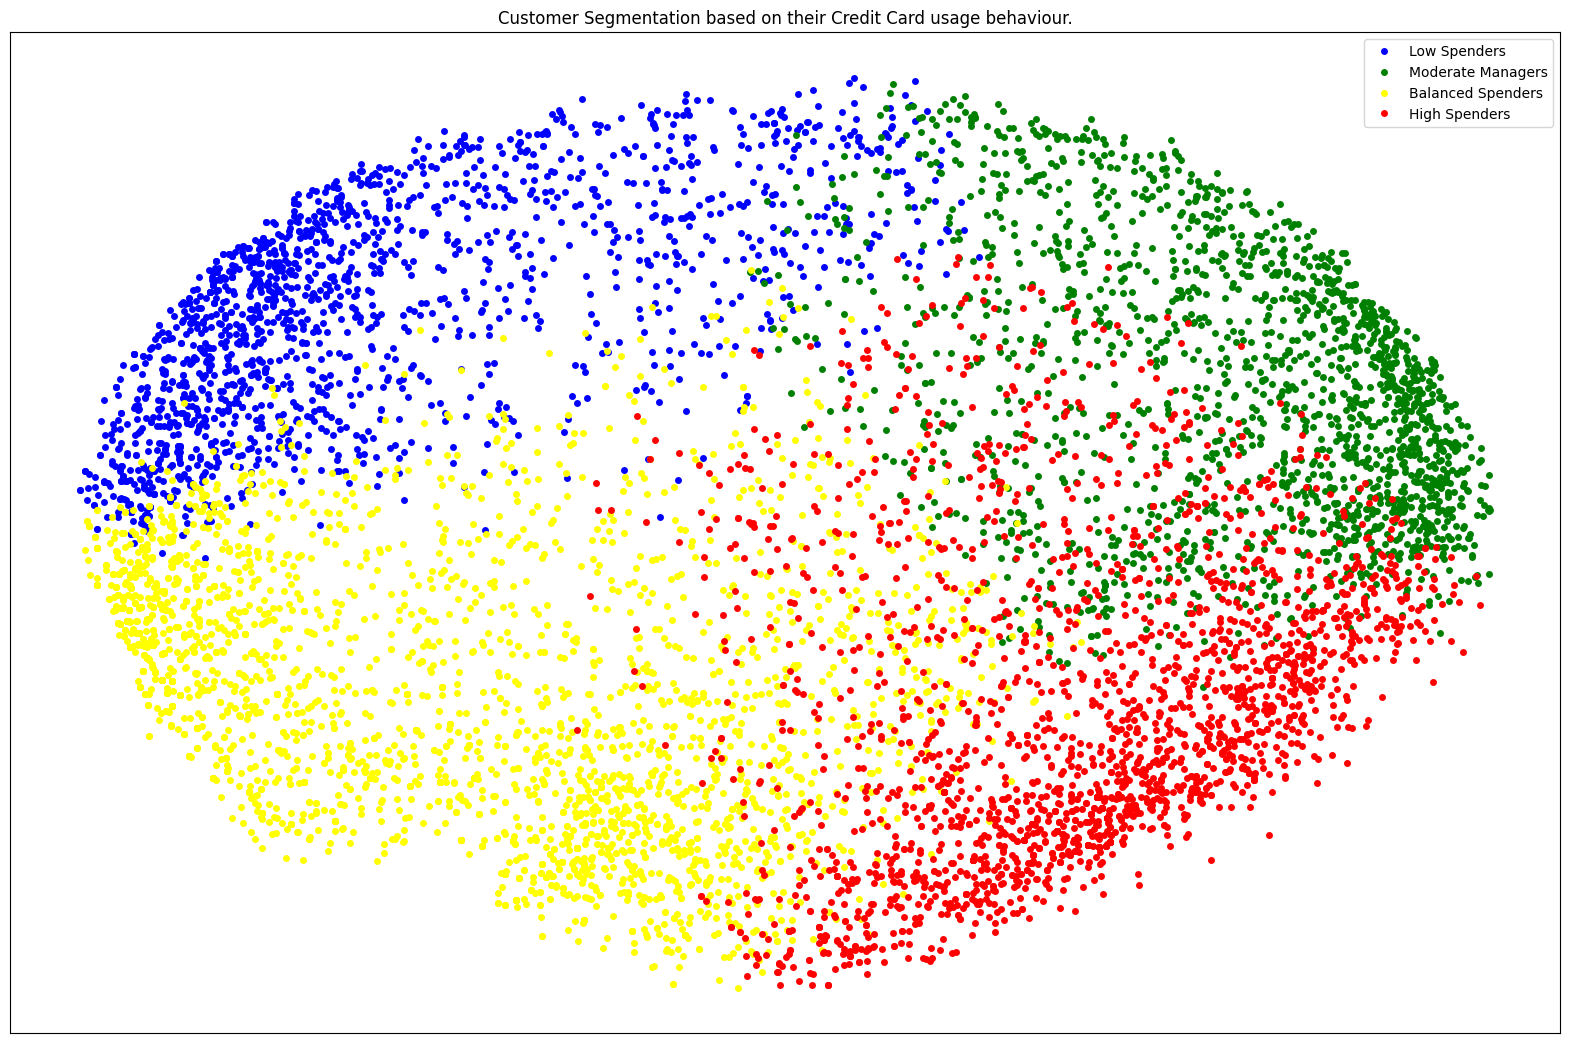

In [29]:

x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'blue',
          1: 'green',
          2: 'yellow', 
          3: 'red'}

names = {0: 'Low Spenders', 
         1: 'Moderate Managers', 
         2: 'Balanced Spenders', 
         3: 'High Spenders'}

df = pd.DataFrame({'x': x, 'y': y, 'label': labels})
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13))

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors.get(name, 'black'), label=names.get(name, 'Unknown'), mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.tick_params(axis='y', which='both', left=False, top=False, labelleft=False)
    
ax.legend()
ax.set_title("Customer Segmentation based on their Credit Card usage behaviour.")
plt.show()
